In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/processed/filled_gabs.csv')

In [7]:
usage = df['usage'].copy()

In [8]:
# 10 minutes = 6 points * 10
window = 60

In [9]:
# 
new_usage = []
for i in range(window, len(usage), window):
    amount = 0
    for w in range(window):
        amount += usage[i-w]
    amount = amount // window
    new_usage.append(amount)


In [10]:
print(new_usage[:20])
print(len(new_usage))

[465.0, 1093.0, 1358.0, 1547.0, 1367.0, 1452.0, 1366.0, 1419.0, 1477.0, 714.0, 519.0, 382.0, 552.0, 399.0, 403.0, 467.0, 582.0, 1500.0, 1325.0, 1428.0]
5347


In [14]:
new_usage = np.array(new_usage)

In [17]:
df_av = pd.DataFrame(
    {'usage': new_usage}
)
df_av.head()

,usage
0,465.0
1,1093.0
2,1358.0
3,1547.0
4,1367.0


In [20]:
df_av['usage'].max(), df_av['usage'].min(), df_av['usage'].mean()

(14890.0, -2150.0, 1663.3237329343558)

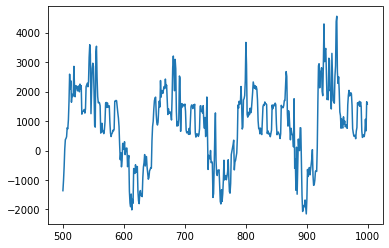

In [26]:
plt.plot(df_av['usage'][500:1000])

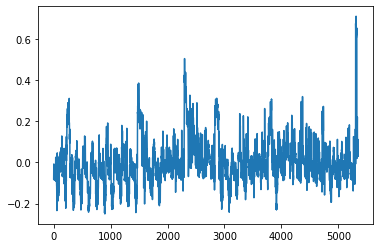

In [32]:
plt.plot(np.tanh((df_av['usage']/df_av['usage'].max() - (df_av['usage']/df_av['usage'].max()).mean())))

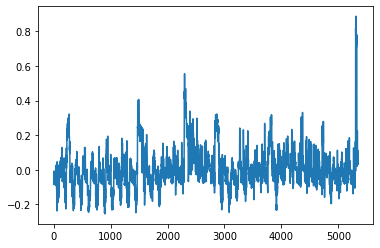

In [34]:
plt.plot(df_av['usage']/df_av['usage'].max() - (df_av['usage']/df_av['usage'].max()).mean())

In [43]:
df_outed = df_av.copy()
df_outed = df_outed[:5200]

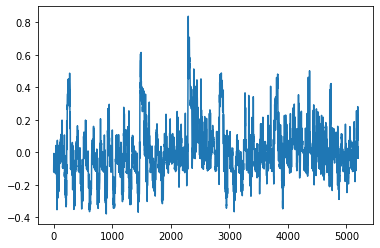

In [44]:
plt.plot(df_outed['usage']/df_outed['usage'].max() - (df_outed['usage']/df_outed['usage'].max()).mean())

In [45]:
df_normalized = df_outed.copy()
df_normalized['usage'] = df_outed['usage']/df_outed['usage'].max() - (df_outed['usage']/df_outed['usage'].max()).mean()

In [7]:
df_averaged = df[:310000].copy()
df_averaged['usage'] = (df_averaged['usage'] - df_averaged['usage'].mean())/((df_averaged['usage'] - df_averaged['usage'].mean()).max())

In [55]:
df_outed['usage'] - df_outed.mean()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
5196    NaN
5197    NaN
5198    NaN
5199    NaN
usage   NaN
Length: 5201, dtype: float64

([<matplotlib.lines.Line2D at 0x2af98ffb790>],
 [<matplotlib.lines.Line2D at 0x2af98ffb4f0>])

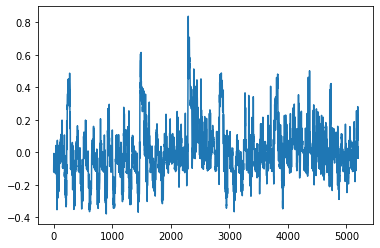

In [52]:
plt.plot(df_normalized['usage']), plt.plot(df_averaged['usage'])

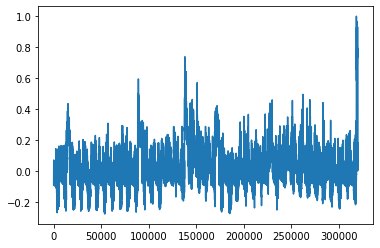

In [8]:
plt.plot(df_averaged['usage'])

In [65]:
df_averaged.to_csv('../datasets/processed/processed_full.csv', index=False)

In [88]:
window = 250

In [89]:
df_windowed = df_averaged.copy()

In [90]:
row = df_windowed['usage']
row[10-window//2:10+window//2].sum()

0.0

In [91]:
df_windowed['usage'] = [row[i-window//2:i+window//2].sum()/window for i in range(0, len(df_windowed))]

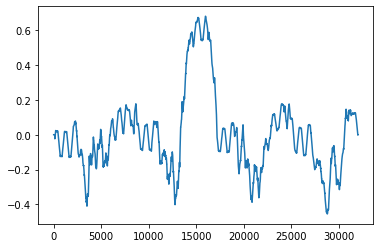

In [92]:
plt.plot(df_windowed['usage'])

In [93]:
df_windowed.to_csv('../datasets/processed/windowed_250.csv', index=False)